In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import lux

In [2]:
def basic_visualization(dataset):
    pass

In [3]:
def BloodGroupTypes(data):
    data.loc[(data['Blood Group'] == 'A+')|(data['Blood Group'] == 'A'),'Blood Group']='A+ve'
    data.loc[(data['Blood Group'] == 'B+')|(data['Blood Group'] == 'B'),'Blood Group']='B+ve'
    data.loc[(data['Blood Group'] == 'O+')|(data['Blood Group'] == 'O'),'Blood Group']='O+ve'
    data.loc[(data['Blood Group'] == 'AB+')|(data['Blood Group'] == 'AB'),'Blood Group']='AB+ve'
    data.loc[(data['Blood Group'] == 'A-'),'Blood Group']='A-ve'
    data.loc[(data['Blood Group'] == 'B-'),'Blood Group']='B-ve'
    data.loc[(data['Blood Group'] == 'O-'),'Blood Group']='O-ve'
    data.loc[(data['Blood Group'] == 'AB-'),'Blood Group']='AB-ve'
    return data

In [4]:
def data_cleaning(dataset):
    print("Initial size of dataset {}".format(dataset.shape))
    err= dataset[ data['Blood Group'] == '#REF!' ].index
    dataset.drop(err, inplace=True)
    print("Dataset Size after removing err records {}".format(dataset.shape))
    errVAl= data[ data['Age in yrs'] == '#VALUE!' ].index
    dataset.drop(errVAl, inplace=True)
    errVAl= data[ data['BMI']== '#VALUE!' ].index
    dataset.drop(errVAl, inplace=True)
    print("Dataset Size after removing err value records {}".format(dataset.shape))    
    invalid_r= dataset[(dataset['Blood Group'].isnull()) & (dataset['Sex'].isnull())& (dataset['Height'].isnull())&(dataset['Weight'].isnull())& (dataset['BMI'].isnull())].index
    dataset.drop(invalid_r, inplace=True)
    print("Dataset Size after removing invalid records {}".format(dataset.shape))
    




    

In [5]:
def data_conversion(dataset):
    dataset=BloodGroupTypes(dataset)
    print("Blood Group Types available {}".format(data['Blood Group'].unique()))
    data['Age in yrs'] = data['Age in yrs'].apply(pd.to_numeric)
    data['Weight'] = data['Weight'].str.rstrip('kg').apply(pd.to_numeric)
    data['Height'] = data['Height'].str.rstrip('cm').apply(pd.to_numeric)
    data['Temperature'] = data['Temperature'].str.rstrip('F').apply(pd.to_numeric)
    data['Pulse'] = data['Pulse'].str.rstrip('per Min').apply(pd.to_numeric)
    data['BP'] = data['BP'].str.rstrip('mmHg')
    data['BMI'] = data['BMI'].apply(pd.to_numeric)
    

In [6]:
def BP_manipulation(data):
    data.loc[(data['BP'].isnull()) & (data['Weight'].between(20,42,inclusive=True))& (data['Age in yrs'] == 10),'BP']='96/117'
    data.loc[(data['BP'].isnull()) & (data['Weight'].between(20,42,inclusive=True))& (data['Age in yrs'] == 11),'BP']='98/119'
    data.loc[(data['BP'].isnull()) & (data['Weight'].between(20,42,inclusive=True))& (data['Age in yrs'] == 12),'BP']='100/121'
    data.loc[(data['BP'].isnull()) & (data['Weight']>=50) & (data['Age in yrs'] >= 13),'BP']='102/124'
    

In [7]:
def column_gen(data):
    new=data['BP'].str.split('/',n=1,expand=True)
    data['systolic']=new[0]
    data['diastolic']=new[1]
    new=data['Left_Eye_Power'].str.split('/',n=1,expand=True)
    data['LEP0']=new[0]
    data['LEP1']=new[1]
    new=data['Right_Eye_Power'].str.split('/',n=1,expand=True)
    data['REP0']=new[0]
    data['REP1']=new[1]
    new=data['Left_Eye_Pwr_WthGlass'].str.split('/',n=1,expand=True)
    data['LEPG0']=new[0]
    data['LEPG1']=new[1]
    new=data['Right_Eye_Pwr_WthGlass'].str.split('/',n=1,expand=True)
    data['REPG0']=new[0]
    data['REPG1']=new[1]
    
    
    

In [8]:
data=pd.read_csv('data.csv')

In [9]:
data_cleaning(data)
data_conversion(data)

Initial size of dataset (2803, 34)
Dataset Size after removing err records (2801, 34)
Dataset Size after removing err value records (2704, 34)
Dataset Size after removing invalid records (1316, 34)
Blood Group Types available ['A+ve' 'O+ve' 'B+ve' 'AB+ve' 'O-ve' 'B-ve' nan 'A-ve' 'AB-ve']


In [10]:
column_gen(data)

In [11]:
errVAl= data[ data['BMI'] == '#VALUE!' ].index


In [12]:
data.head(400)

,UHID,Sex,Age in yrs,Blood Group,Class,School ID,Height,Weight,BMI,Temperature,...,systolic,diastolic,LEP0,LEP1,REP0,REP1,LEPG0,LEPG1,REPG0,REPG1
0,100-0000-0001,Male,13,A+ve,8,S0000001,152.2,57.2,24.7,96.4,...,104,75,6,6,6,36,6,6,6,12
1,100-0000-0002,Male,14,O+ve,8,S0000001,160.7,36.9,14.3,97.5,...,150,69,6,6,6,6,NaN,NaN,NaN,NaN
2,100-0000-0003,Female,13,O+ve,8,S0000001,143.7,37.2,18.0,97.7,...,113,67,6,6,6,6,NaN,NaN,NaN,NaN
3,100-0000-0004,Female,13,B+ve,8,S0000001,157.3,45.4,18.3,97.8,...,114,78,6,6,6,6,NaN,NaN,NaN,NaN
4,100-0000-0005,Male,14,B+ve,8,S0000001,154.2,40.1,16.9,9.3,...,95,56,6,6,6,6,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,100-0000-0497,Female,13,O+ve,8,S0000003,152.7,35.5,15.2,98.5,...,111,85,6,12,6,12,6,6,6,6
422,100-0000-0498,Male,13,B+ve,8,S0000003,164.7,62.1,22.9,97.5,...,119,71,6,24,6,24,6,6,6,6
423,100-0000-0499,Female,13,O+ve,8,S0000003,154.5,39.0,16.3,99.3,...,113,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
424,100-0000-0500,Female,14,A+ve,8,S0000003,154.5,44.6,18.7,98.5,...,147,91,6,6,6,6,NaN,NaN,NaN,NaN


In [13]:
#data1 = pd.read_excel("HKinterns_shared_data.xlsx",engine='openpyxl',)

In [14]:
data.columns

Index(['UHID', 'Sex', 'Age in yrs', 'Blood Group', 'Class', ' School ID',
       'Height', 'Weight', 'BMI', 'Temperature', 'BP', 'Pulse', 'CBTestResult',
       'Caries', 'Discoloration', 'Healthy_Gums', 'Malocclusion',
       'Oral_Hygine', 'TeethWellFormed', 'Serious_Dental_Issue',
       'Dentist_Recommendation', 'LEFT_EAR', 'RIGHT_EAR', 'ENT_Issue',
       'Eye_Issue', 'ENT_Issue_Detail', 'Eye_Issue_Detail', 'Wears_Glass',
       'Left_Eye_Power', 'Right_Eye_Power', 'Left_Eye_Pwr_WthGlass',
       'Right_Eye_Pwr_WthGlass', 'Overall Summary', 'Recommendation',
       'systolic', 'diastolic', 'LEP0', 'LEP1', 'REP0', 'REP1', 'LEPG0',
       'LEPG1', 'REPG0', 'REPG1'],
      dtype='object')

In [15]:
data.head()

,UHID,Sex,Age in yrs,Blood Group,Class,School ID,Height,Weight,BMI,Temperature,...,systolic,diastolic,LEP0,LEP1,REP0,REP1,LEPG0,LEPG1,REPG0,REPG1
0,100-0000-0001,Male,13,A+ve,8,S0000001,152.2,57.2,24.7,96.4,...,104,75,6,6,6,36,6,6,6,12
1,100-0000-0002,Male,14,O+ve,8,S0000001,160.7,36.9,14.3,97.5,...,150,69,6,6,6,6,NaN,NaN,NaN,NaN
2,100-0000-0003,Female,13,O+ve,8,S0000001,143.7,37.2,18.0,97.7,...,113,67,6,6,6,6,NaN,NaN,NaN,NaN
3,100-0000-0004,Female,13,B+ve,8,S0000001,157.3,45.4,18.3,97.8,...,114,78,6,6,6,6,NaN,NaN,NaN,NaN
4,100-0000-0005,Male,14,B+ve,8,S0000001,154.2,40.1,16.9,9.3,...,95,56,6,6,6,6,NaN,NaN,NaN,NaN


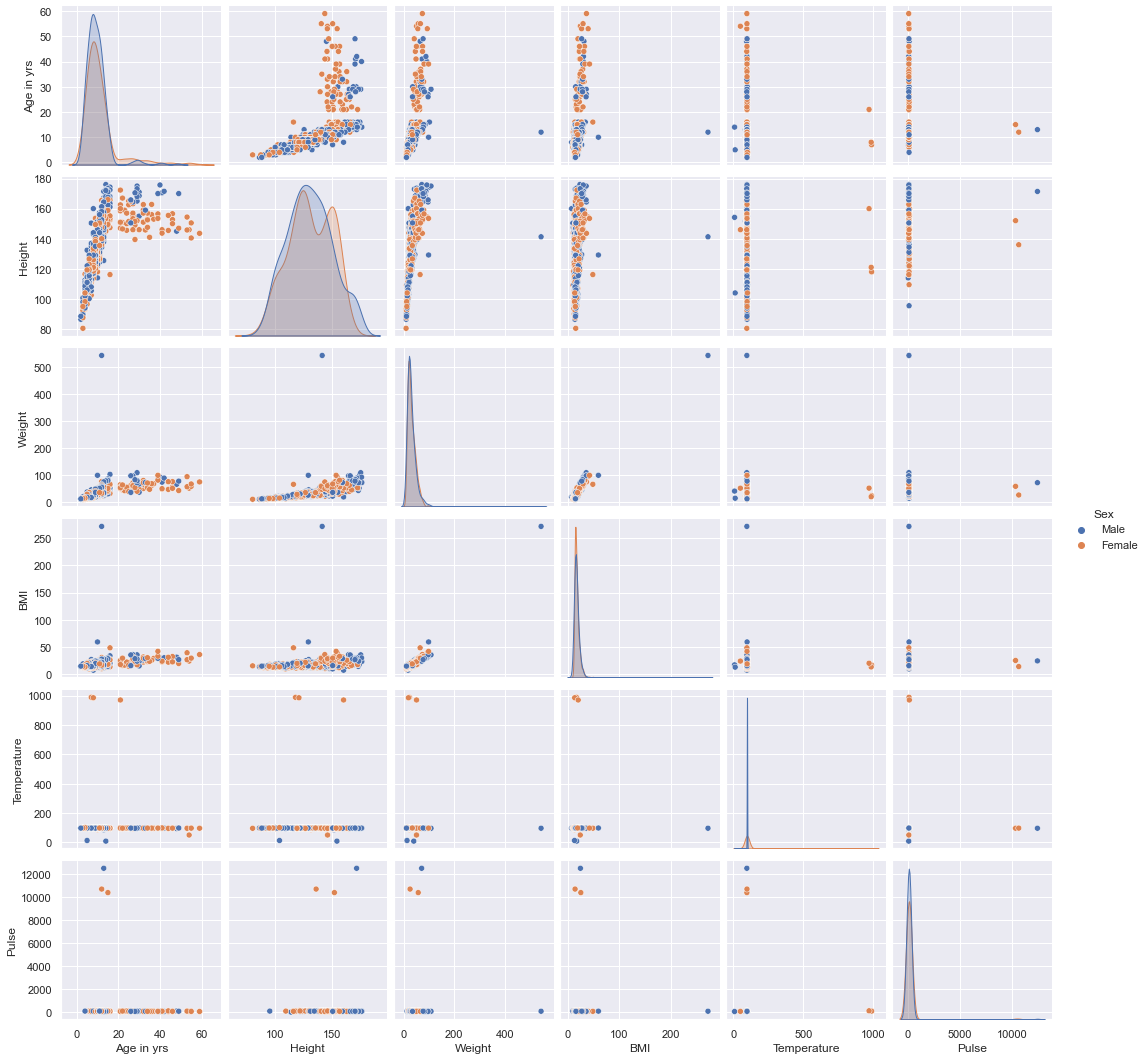

In [23]:

sns.pairplot(data,hue='Sex')


In [16]:
data.corr(method ='spearman')

,Age in yrs,Height,Weight,BMI,Temperature,Pulse
Age in yrs,1.000000,0.939495,0.880381,0.533468,-0.237794,-0.214955
Height,0.939495,1.000000,0.932793,0.583786,-0.251815,-0.176448
Weight,0.880381,0.932793,1.000000,0.813248,-0.306335,-0.048817
BMI,0.533468,0.583786,0.813248,1.000000,-0.360938,0.047238
Temperature,-0.237794,-0.251815,-0.306335,-0.360938,1.000000,0.125926
Pulse,-0.214955,-0.176448,-0.048817,0.047238,0.125926,1.000000


In [25]:
bmi_correl = data[['Height','Weight','BMI','Age in yrs']].corr(method='pearson')
bmi_correl

,Height,Weight,BMI,Age in yrs
Height,1.000000,0.632792,0.290891,0.656220
Weight,0.632792,1.000000,0.915726,0.550950
BMI,0.290891,0.915726,1.000000,0.330319
Age in yrs,0.656220,0.550950,0.330319,1.000000


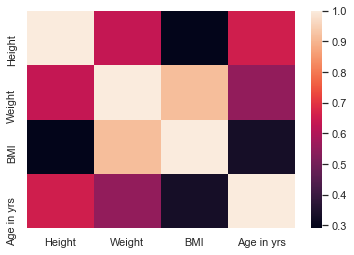

In [26]:
import seaborn as sns; sns.set_theme()
import plotly.express as px
ax = sns.heatmap(bmi_correl)
fig = px.imshow(data)

In [ ]:

 data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAWIAAAD/CAYAAADL09xTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjQuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8+yak3AAAACXBIWXMAAAsTAAALEwEAmpwYAAAoR0lEQVR4nO3de1xU1d4/8M8AcksnipgpFS0fL5iCWspNDx4VBElFLhXJI2geShPx4XQKSk3DC5meOCXGMX9d0AdPWoFAF7x1jBDDg5Xg3fRRvBwYFWU6ggIz+/eHL7cil5kBZvbM+Hn32q/Yt7W/M9aX5VprryUTBEEAERFJxkbqAIiI7ndMxEREEmMiJiKSGBMxEZHEmIiJiCTGRExEJDEmYiIiA/3nP//B5MmTcf78+Rbnjh49isjISAQHB2PhwoVoamrSWR4TMRGRAQ4ePIgXXngBZ86cafX8a6+9hsWLF2P79u0QBAFbt27VWSYTMRGRAbZu3YolS5ZAoVC0OHfhwgXcuHEDw4cPBwBERESgsLBQZ5l2XR0kEZGlUavVUKvVLY7L5XLI5fJmx1asWNFmOSqVCm5ubuK+m5sbqqurdT7fpIm48fJpUz7OrO0f+rrUIZiNsTX7pA7BbJQ99rTUIZiN4WfzO3W/Ifkm6x/fICMjo8XxhIQEzJ8/X+9yWpsxQiaT6byPNWIisk5ajd6XxsXFITw8vMXxe2vDuiiVSly+fFncv3TpUqtNGPdiIiYi66TRPVrhttaaIDqiV69ecHBwwIEDB/D0009j27ZtCAgI0HkfO+uIyCoJglbvrbPi4+NRUVEBAFizZg3S0tIwadIk1NfXIzY2Vuf9MlNOg8k24jvYRnwH24jvYBvxHZ1tI244X6H3tfa9PTv1rM5i0wQRWacuqOmaChMxEVknAzrrpMZETETWyYDOOqkxERORVeqKTjhTYSImIuukZSImIpIWa8RERBJjZx0RkcRYIyYikhhHTRARSYyddURE0hIEthETEUmLbcRERBJj0wQRkcQ0jVJHoDcmYiKyTmyaICKSGJsmiIgkxhoxEZHEWCMmIpIYEzERkbQECxo1odcqzuvXr29x7L333uvyYIiIuoyg1X+TWLs14jVr1uDKlSv4/vvvcebMGfF4U1MTysvL8ec//9nY8RERdYy1NE1MnDgRp06dwk8//QRvb2/xuK2tLebNm2f04IiIOsxINd2CggJkZmaisbERM2fORExMTLPzP/zwA9asWQMAGDhwIFJTU/HAAw+0W2a7idjLywteXl4IDAxEjx49Ohk+EZEJGaFGXF1djfT0dOTk5MDe3h7R0dHw8fFB//79AQBqtRopKSnYtGkT+vfvjw0bNiA9PR2LFi1qt1y92ogLCwvh5+eHwYMHY/DgwfDw8MDgwYM7/6mIiIzFgDZitVqN8+fPt9jUanWzIktKSuDr6wsXFxc4OzsjODgYhYWF4vkzZ86gZ8+eYmIeN24cdu3apTNUvUZNZGZmYuPGjRgwYIAhXwMRkXSa9J8YPisrCxkZGS2OJyQkYP78+eK+SqWCm5ubuK9QKFBeXi7uP/7446iqqsKxY8fg4eGB7777DpcvX9b5fL0SsaurK5MwEVkWA9qI4+JeRHh4eIvjcrm8eZGC0OIamUzW7PpVq1Zh8eLF0Gq1eO6559CtWzedz283EW/btg0A0LNnT8ydOxcTJkyAnd2dW6ZNm6bzAUREkjCgjVgul7dIuq1RKpUoKysT91UqFRQKhbiv0Wjw6KOP4osvvgAAHD58GO7u7jrLbbeNuLS0FKWlpXB2doaLiwsOHDggHistLdVZOBGRZIwwjtjf3x/79u1DTU0N6uvrsWPHDgQEBIjnZTIZXnzxRVRXV0MQBHzyyScIDQ3VWW67NeK0tDS9AyQiMitGGDWhVCqRlJSE2NhYNDY2IioqCl5eXoiPj0diYiI8PT2RmpqKP/3pT2hoaICfnx9mz56ts1yZ0Fqjxz0mTpwIjebO+k8ymQyOjo7o168fkpOT0atXL70+ROPl03pddz/YP/R1qUMwG2Nr9kkdgtkoe+xpqUMwG8PP5nfq/vovl+t9rVNU+8PLjE2vzrqAgAD07t0bUVFRAID8/HxUVFRg/PjxWLhwIT777DNjxkhEZDgLerNOr3HEBw4cwMyZM9G9e3d0794d06dPx/HjxxEUFITa2lpjx0hEZDhB0H+TmF6J2MbGBj/++KO4/+OPP8Le3h6XL19GkwFj9YiITEar1X+TmF5NE2lpaUhJScFf/vIXAEDfvn2RlpaGLVu24MUXXzRqgEREHWIGCVZfeiXigQMHIicnB7W1tbC1tUX37t0BgBP/EJH5MoPpLfXVbiJevHgxli1bhhkzZjR7e+S2jRs3Gi0wIqJOuWukl7lrNxE///zzANDsXWsiIotgQU0T7XbWDR06FADg7e0NW1tbnDp1CsOHD4dMJms2PzERkdmxoM46vUZNZGVl4W9/+xs+++wzXL9+HW+99RY+/vhjY8dGRNRxFrRUkl6JODc3Fx9//DGcnJzw0EMP4csvv8RXX31l7NiIiDpM0Ap6b1LTa9SEjY0N7O3txX0HBwfY2toaLSgiok4zgyYHfemViL29vfHOO++gvr4eu3btwpYtW+Dj42Ps2IiIOs6CRk3o1TSRnJyMxx9/HB4eHsjLy8Mf//hHvPHGG8aOjYio4yyos67dGrGHh0ez8cO3J2rbuXMnli9fjqNHjxo3OiKijjKDBKuvdhPxsWPHxJ+nTZsmrthBRGT2zGAyH33p1UYMoNU364iIzJa11Ijvpsf88URE5sOCOutYIyYi62QG44P11W4iHj9+vJiAq6urMWHCBAC3ascymQy7d+826GFcHugO70PvSh2C2fi94nupQzAb/y92j9QhmI3hnbxfsJamiU2bNpkqDiKirmUtNWJ9FwUlIjI7ZjCHhL70biMmIrIoFlQj1uvNOiIii9Ok0X8zQEFBAUJDQxEUFITs7OwW5w8fPozIyEhMnToVL7/8MtRqtc4ymYiJyDoZYRrM6upqpKenY/PmzcjLy8OWLVvw22+/NbtmxYoVSExMRH5+Pp544gm9pgxm0wQRWScDmibUanWrNVe5XA65XC7ul5SUwNfXFy4uLgCA4OBgFBYWIiEh4c5jtVpcv34dAFBfX48HH3xQ5/OZiInIKhkyfC0rKwsZGRktjickJDRbKk6lUsHNzU3cVygUKC8vb3ZPSkoKZs2ahZUrV8LJyQlbt27V+XwmYiKyTgbUiOPi4hAeHt7i+N21YaD1N4zvftntxo0bWLhwIbKysuDl5YVPP/0UycnJ+Oijj9p9PhMxEVknAxLxvU0QbVEqlSgrKxP3VSoVFAqFuH/ixAk4ODjAy8sLwK0FmN9//32d5bKzjoisk0aj/6Ynf39/7Nu3DzU1Naivr8eOHTsQEBAgnu/bty+qqqpw+vRpAMDu3bvh6emps1zWiInIKhljLTqlUomkpCTExsaisbERUVFR8PLyQnx8PBITE+Hp6Ym0tDT8z//8DwRBgKurK1auXKmzXCZiIrJORnqhY8qUKZgyZUqzYxs2bBB/Hjt2LMaOHWtQmUzERGSdrGXSHyIii2VBrzgzERORVRI0rBETEUmLNWIiIokxERMRScsYw9eMhYmYiKwTEzERkcQsp6+OiZiIrJPQZDmZmImYiKyT5eRhJmIisk7srCMikhprxERE0rKkGrHO+YjvXibktri4OKMEQ0TUZbQGbBJrs0Y8b948HDt2DCqVChMmTBCPazQaPProoyYJjoioo4QmqSPQX5uJeNWqVbh27RpWrFiBRYsW3bnBzg6urq4mCY6IqKMEM6jp6qvNRNy9e3d0794dmZmZOHXqFK5evSounFdZWYlRo0aZLEgiIoNZQyK+7a233sIPP/yAPn36iMdkMhk2btxo1MCIiDrDKmrEt5WUlGDnzp2wt7c3RTxERF3CqhLxY489hps3bzIRE5FFETQyqUPQW5uJ+I033gBwa5REWFgYRo4cCVtbW/F8Wlqa8aMjIuogq6gRe3t7N/s3EZElEbTGqREXFBQgMzMTjY2NmDlzJmJiYsRzR48eRUpKirhfU1ODBx98EF9//XW7ZbaZiMPDwwEAFy9ebHZcJpPBwcGhQx+AiMhUjFEjrq6uRnp6OnJycmBvb4/o6Gj4+Pigf//+AIDBgwcjLy8PAFBfX49nn30WS5cu1VmuzjbiefPm4cSJExg0aBAEQcDJkyfh5uYGW1tbLFu2DH5+fp37ZERERiAIXV8jLikpga+vL1xcXAAAwcHBKCwsREJCQotr169fj1GjRmHkyJE6y9WZiJVKJZYtW4ahQ4cCAI4fP46MjAy8+eabmD9/Pr788ksDPwoRkfEZUiNWq9VQq9UtjsvlcsjlcnFfpVLBzc1N3FcoFCgvL2+1vK1bt6KgoECv5+tMxBcuXBCTMAAMGjQIlZWVeOyxx6DRaPR6CBGRqWkNGDWRlZWFjIyMFscTEhKazbdz+6W2u8lkLZ9TUFCAwMBAvd9C1pmI3d3dsWbNGoSFhUGr1eLrr79G37598csvv8DGRuecQUREkjCksy4uLk7sF7vb3bVh4FYLQVlZmbivUqmgUCha3Ldr1y68/PLLej9fZyZ999130dTUhFdffRUpKSnQarVYuXIlzp07h7ffflvvBxERmZKglem9yeVy9O7du8V2byL29/fHvn37UFNTg/r6euzYsQMBAQHNnysIOHz4MEaMGKF3rDprxN27d282HOO2qVOn6v0QIiJTa6UVodOUSiWSkpIQGxuLxsZGREVFwcvLC/Hx8UhMTISnpydqamrQrVs3g0aXtTt8LTc3Fx4eHs3aQARBgEwmw9GjRzv3iYiIjMhY44inTJmCKVOmNDu2YcMG8WdXV1fs3bvXoDLbTMS5ubkAgGPHjhlUIBGROTCks05qOtuIGxoa8Pe//x3Jycn4z3/+g4yMDDQ0NJgiNiKiDtMKMr03qelMxKmpqairq8Phw4dha2uLyspKLFy40BSxERF1mCDI9N6kpjMRHz58GH/+859hZ2cHJycnrFq1iu3DRGT2DBk1ITWdoyZkMhkaGhrEDrurV6+2OoCZiMicGGPUhLG0WSO+cOECACA2NhazZs3CpUuXsGLFCkRGRnIVZyIye1ZRI46OjoazszNGjx6NP/zhDwgJCQEAZGZmwsPDw2QBEhF1hEZrOW/+tpmIf/zxR1RWVqKsrAz/+te/8Ouvv+Khhx5CbW0tbt68iWHDhpkyTiIig1hS00S7bcR9+vRBnz59EBERAbVajd27d+OTTz7B3//+dxw6dMhUMRIRGcwchqXpq81E3NTUhAMHDuDHH39EcXExbty4AX9/fyxYsAC+vr6mjJGIyGDmMCxNX20m4lGjRmHEiBEICQlBRkYGevfubcq4iIg6xZKaJtpszY6OjkZNTQ2++uor5OTk4MCBA9BqLWg1PiK6r1nSm3UyobWZju9SXV2NvXv3ori4GBUVFRg4cCDGjBmDF154weCH2dn36nCg1ub37ZxC9DY7z/FSh2A2ev9XqNQhmI3q2s7Nc1PaM0Lva30u5nTqWZ2l11JJkydPRt++ffHzzz8jLy8PBw8e7FAiJiIyFQtqmWg7Ee/atQu//PILDhw4gPPnz2PYsGHw8/NDeno6BgwYYMoYiYgMZg5NDvpqMxFv3rwZvr6+ePPNNzF06FAui0REFsUqRk188sknpoyDiKhLWdLQAp1txERElkhjDTViIiJLpgUTMRGRpAQmYiIiabGNmIhIYpZUI+aYNCKySloDNkMUFBQgNDQUQUFByM7ObnH+9OnTmDFjBqZOnYrZs2ejtrZWZ5lMxERklTSQ6b3pq7q6Gunp6di8eTPy8vKwZcsW/Pbbb+J5QRAwd+5cxMfHIz8/H4MHD8ZHH32ks1w2TRCRVTJkBSS1Wg21Wt3iuFwuh1wuF/dLSkrg6+sLFxcXAEBwcDAKCwuRkJAA4NZiy87OzggICAAAzJkzp9Vy78VETERWyZDha1lZWcjIyGhxPCEhAfPnzxf3VSoV3NzcxH2FQoHy8nJxv7KyEo888giSk5Nx5MgRDBw4EIsXL9b5fCZiIrJKhkz6ExcXh/Dw8BbH764NA7eaHu5196r2TU1N2L9/P/73f/8Xnp6e+Nvf/oZ33nkH77zzTrvPZyImIqtkSCfcvU0QbVEqlSgrKxP3VSoVFAqFuO/m5oa+ffvC09MTADB58mQkJibqLJeddURklbQymd6bvvz9/bFv3z7U1NSgvr4eO3bsENuDAWDEiBGoqanBsWO35lL+/vvvMWTIEJ3lskZMRFZJY4QylUolkpKSEBsbi8bGRkRFRcHLywvx8fFITEyEp6cn1q1bh0WLFqG+vh6PPvoo3n33XZ3l6lyhoytxhY47uELHHVyh4w6u0HFHZ1fo+EfPGL2vfeFiy/HApsQaMRFZJU76Q0QkMatYKomIyJIZ8kKH1JiIicgqGaOzzliYiInIKrFGTEQkMc5HTEQkMatJxG+88Ua7N6elpXVpMEREXcWC1g5tPxF7e3ubKg4ioi5lNTXi1mYjIiKyBFYzaiI2Nrbdmzdu3NilwRARdRWrGTVRW1uLS5cuISQkBH/84x/h6OhoqriIiDrFapom8vLy8H//93/49ttvsXbtWvTp0weTJk1CQEAA7O3tTRUjEZHBLCkR65yP+IknnsC8efPwxRdfYM6cOThy5AhiYmKQkpJiiviIiDpEMGCTmt7jiDUaDaqqqlBdXY2rV6+2umQIEZG5sJo24sbGRuzduxeFhYXYv38/Ro4ciZCQECxZsoRNE0Rk1qxm1ISvry/kcjkmTpyIt99+W+ysO3jwIABg1KhRxo+QiKgDtGbR6KCfdhPxk08+CQA4cuQIjhw5Iq5WKggCZDIZh68RkdmypM66dhPxpk2bcOrUKfTo0QMKhQIfffQRfv75ZwwZMgTx8fGmipGIyGCWUx/WkYjXr1+Pf/zjH7C1tYW3tzfOnz+PoKAg7N+/H2+99ZZei+IREUnBamrE+fn5+O6771BXV4fAwECUlJTAyckJMTExCA3lIodEZL6aZJZTJ243EdvZ2cHJyQlOTk5wd3eHk5MTAMDW1lb8mYjIHFlOGtbxQoeNzZ3Ttra2zc7d7rgjIjJHWgM2QxQUFCA0NBRBQUHIzs5ucT4jIwPjxo1DWFgYwsLCWr3mXu3WiM+cOSNO/HP3z4Ig4OzZswaGT0RkOsYYvlZdXY309HTk5OTA3t4e0dHR8PHxQf/+/cVrDh06hPfeew8jRozQu1ydnXVERJbIkDSsVquhVqtbHJfL5ZDL5eJ+SUkJfH194eLiAgAIDg5GYWEhEhISxGsOHTqEDRs24Ny5cxg1ahSSk5Ph4ODQ7vM5MTwRWSVDmhyysrKQkZHR4nhCQgLmz58v7qtUKri5uYn7CoUC5eXl4v7169cxePBgJCcno1evXkhJScGHH36IpKSkdp/PNeuIyCppDKgTx8XFtboQxt21YQCtzrFzd3/ZAw88gA0bNoj7L774It58800mYiK6PxlSI763CaItSqUSZWVl4r5KpYJCoRD3L168iJKSEkRFRQG4lbjt7HSnWZ3TYBIRWSLBgH/05e/vj3379qGmpgb19fXYsWMHAgICxPOOjo5YvXo1zp07B0EQkJ2djaCgIJ3lMhETkVUyxvA1pVKJpKQkxMbGYtq0aZg8eTK8vLwQHx+PiooKPPzww0hNTcXcuXMREhICQRAwa9YsneXKBBNOLGxn38tUjzJ7v29/W+oQzIad53ipQzAbvf+Lb6zeVl17rFP3v/L4c3pf++GZrZ16VmexjZiIrJIhnXVSYyImIqtkNZP+EBFZKkM64aTGRExEVok14jaUPfa0KR9n1v5f7B6pQzAby9VrpA7BbJw/9a3UIVgN1oiJiCTGGjERkcQ0phuZ22lMxERklaxmFWciIkvFNmIiIomxjZiISGJsmiAikhibJoiIJMZRE0REEmPTBBGRxNhZR0QkMbYRExFJjE0TREQSY2cdEZHE2DRBRCQxNk0QEUnMhOsid5qN1AEQERmDFoLemyEKCgoQGhqKoKAgZGdnt3ndnj17MH68fiuUs0ZMRFbJGG3E1dXVSE9PR05ODuzt7REdHQ0fHx/079+/2XWXL1/GqlWr9C6XNWIiskoaQdB701dJSQl8fX3h4uICZ2dnBAcHo7CwsMV1ixYtQkJCgt7lskZMRFbJkCYHtVoNtVrd4rhcLodcLhf3VSoV3NzcxH2FQoHy8vJm92zcuBFPPvkkhg0bpvfzmYiJyCoZkoizsrKQkZHR4nhCQgLmz58v7rfWASiTycSfT5w4gR07duCzzz5DVVWV3s9nIiYiq2TIqIm4uDiEh4e3OH53bRgAlEolysrKxH2VSgWFQiHuFxYW4tKlS4iMjERjYyNUKhWmT5+OzZs3t/t8JmIiskqG1IjvbYJoi7+/P9auXYuamho4OTlhx44dWLZsmXg+MTERiYmJAIDz588jNjZWZxIG9OysU6lUAICysjJkZ2ejrq5On9uIiCQjGPCPvpRKJZKSkhAbG4tp06Zh8uTJ8PLyQnx8PCoqKjocq0zQUX9fsmQJbGxsEBMTg9mzZ2P06NH4/fffsXbtWoMf9mvfqR0O1Nr8qNX92/d+sVxdpvui+8T5U99KHYLZ6PZIv07d/9RjY/S+9ud/F3fqWZ2ls0ZcUVGBt956C9999x2ioqKwcuVKXLx40RSxERF1mCAIem9S05mINRoNtFotdu/ejYCAANTX16O+vt4UsRERdZix3qwzBp2JODw8HGPGjEGvXr0wbNgwRERE4PnnnzdFbEREHWaMNmJj0TlqwsHBAcXFxbC1tQUAZGdn4+GHHzZ6YEREnaE1gyYHfemsEWdnZ4tJGACTMBFZBI2g1XuTms4a8aOPPorY2FgMGzYMDg4O4nFD3qMmIjI1c2hy0JfORDx8+HAThEFE1LUsqWlCZyJ2dHREWFhYs4kuiIjMnVXViG/cuIH//u//Rt++fREeHo7AwEB069bNFLEREXWYJdWIdXbWJSQkYPv27XjppZdQWlqKsLAwpKam4ujRo6aIj4ioQyxp+Jpec03U19fj/PnzOHfuHGxsbPDggw9ixYoV+Otf/2rs+IiIOkQjaPTepKazaeLVV19FaWkpAgICMHfuXIwcORIA0NDQgDFjxuDVV181epBERIYyh1eX9aUzEfv5+WHZsmVwdnZudtze3h7ffPON0QIjIuoMc3h1WV86E3FUVFSb5ziSgojMlVXViImILJEljZpgIiYiq2QOoyH0pTMRq9VqFBQU4Nq1a82q+nzFmYjMmTnMIaEvnYl4wYIF6NGjBwYMGNBstVIiInNmVW3Ely9fxqeffmqKWIiIuowltRHrfKFj8ODBOHbsmCliISLqMpa0VJLOGvHJkycRHh4OV1dXODg4QBAEyGQy7N692xTxERF1iFWNI87IyDBFHEREXUqjtYLOun/+858YN24c/vWvf7V6vlevXkYLioios4w1fK2goACZmZlobGzEzJkzERMT0+z8zp078cEHH0Cr1cLT0xOpqamwt7dvt8w2E3FFRQXGjRuH0tLSVs9PmzbN8E9ARGQixuisq66uRnp6OnJycmBvb4/o6Gj4+Pigf//+AIC6ujqkpqYiNzcXjzzyCJKSkpCbm6tzweU2E3FiYiIAIC0trQs/BhGRaRjSCadWq6FWq1scl8vlkMvl4n5JSQl8fX3h4uICAAgODkZhYaH4XoWzszO+//57dOvWDXV1dbhy5Uqz+9vCN+uIyCoZ0jSRlZXVan9YQkIC5s+fL+6rVKpmc+woFAqUl5c3u6dbt2744Ycf8Prrr0OhUGDMmDE6n89ETERWyZAacVxcHMLDw1scv7c221qZrb3oNnbsWJSWluK9997D0qVLdc7drtfE8ABQW1ur76VERJLTCoLem1wuR+/evVts9yZipVKJy5cvi/sqlQoKhULcv3btGoqLi8X9KVOm4Pjx47qDFXQ4cuSIEBwcLIwdO1aoqqoSAgMDhUOHDum6jYjI6lRVVQnjxo0Trly5ItTV1QlTp04VDh48KJ6vqakRfH19hQsXLgiCIAjvv/++sHjxYp3l6qwRL1++HOvWrYOLiwuUSiWWLl2KJUuW6PMLiYjIqiiVSiQlJSE2NhbTpk3D5MmT4eXlhfj4eFRUVOChhx7CsmXL8PLLL2Pq1Kk4c+YMXnvtNZ3lygSh/YaUiIgI5OTkYNq0adi2bRsAYOrUqcjPz++SD0ZEdL/TWSN2cXHBsWPHxAbp/Px8PPjgg0YPjIjofqGzRlxZWYnk5GRUVFTA0dERffv2xerVq9GvXz9TxUhEZNV0JuLb6urqoNVq0b17d2PHRER0X9E5jnjGjBnNxsnJZDI4OjqiX79+mDNnDpspiIg6SWci7t+/P+zs7BAZGQkA+Prrr1FVVQWlUomFCxdydjYiok7SmYgPHjyInJwccd/DwwORkZFYs2aNOIqCiIg6TueoicbGRpw8eVLcP3HiBLRaLW7cuIHGxkajBkdEdD/QmYgXLVqE+Ph4REZGIiIiAnPnzsXixYuxdu1ahIWFmSLGFs6fP4/x48e3OD5o0KA276moqMDChQvbLTclJaVZ7f+28vJyrF692vBAjWjWrFnYuXOnuL9q1SqMGDECDQ0N4rExY8bg3Llzrd6v688uJycHKSkpLY7//vvveOWVVzoYtTRKS0sxYsQIhIWFYerUqZg0aRIyMzMB3OoDeeqpp5p9b8Ct72fGjBkA2v4uzMGJEycwaNAgbN++vUvKe//997n6jgR0Nk34+Phg165dOHLkCIqKilBcXIzZs2fjl19+MUV8XcbT0xOenp4duve3337DlStXujiizvHz88PPP/+MoKAgALem5xs2bBgOHDgAPz8/nD17Fs7OznB3d2/1/ry8vA49t7a21iLXMBw6dCg2bdoEALh+/TpCQ0PF765Hjx4oLi4Wf7mfPn0aKpVKr+kLpZaTk4Pg4GB8/vnnCA4O7nR5CxYs6IKoyFA6E/G5c+ewZcsW5OTkQK1WY86cOfjwww9NEVuHaDQavPvuu9i/fz80Gg0iIiIwc+ZMlJaWIiMjA5s2bcKJEyeQkpICjUaDkSNHoqioSKxd7tmzB5s3b8aVK1cwZ84cTJo0CR988AHq6uqQmZmJuXPnSvwJb/H19cXKlSsB3Jqs2t7eHiEhISguLoafnx/Kysrg7++Pbdu2ISsrC1qtFkOGDMGSJUvg4OCAQYMG4fjx4/j999/x+uuvo7KyEu7u7qiqqhI7YM+ePYsZM2bg4sWL8PPzw/Lly7F8+XKoVCrMmzcP69atk/Ir6LAbN27A1tYWPXr0AABMnDgR27dvFxPxt99+i+DgYJw6dUrKMHVqampCfn4+srOzER0djcrKSvTp0welpaVYvnw5bG1tMXz4cJw6dQqbNm3C2bNnsXTpUly7dg2Ojo5YvHgxnnzyyWZlpqSkwNvbG97e3khISMCAAQNw9OhRuLq64v333xfn4QWAL774Aj/99JM4s1hGRgbs7e1x8+ZN/Prrr/j3v/+NmJgYNDQ0IDc3FzY2NvDy8kJqaqopvyaL0GbTxM6dOzF79mw8++yzqK2txerVq6FQKJCQkICHH37YlDG2SqVSISwsrNkGAFu3bgUA5Obm4ssvv8Tu3btRVlbW7N6UlBQsWLAAeXl5cHd3h0ajEc81NDTgiy++wPr165Geng65XI7ExESMHz/ebJIwAAwZMgSVlZW4efMmiouLMXr0aIwePVqc+amsrAxKpRJbt27F559/jry8PLi6uuLjjz9uVs66devwxBNP4JtvvsG8efOazRT173//G2vXrsV3332HoqIinDx5EosWLYJCobC4JHzo0CGEhYVhypQpGD9+PLy9vcVZs/7whz9g//79Yp/Hnj17MG7cOCnD1cuePXvQs2dPPPHEEwgMDMTnn3+OxsZGvP7661i9ejW2bdsGO7s7da3k5GS89tpryM3NxbJly5CUlNRu+ceOHcOsWbPw9ddfQy6Xo6CgoNn50NBQ7Nu3D9evX4cgCCgoKBD/P2xoaMC3336L559/HuvXr8dXX32FnJwcyGQyVFdXd/2XYeHarBHPnz8fISEh2LJlC/r27Qug9Xk3paJQKFr89XrQoEHYt28fjh49ip9++gnArRdRjh8/Li5lcu3aNVy4cAFjx44FAERGRmLjxo1iGRMmTIBMJsOAAQNw9epVE30aw9na2mLYsGGoqKhAcXExYmJi4O7ujhs3bqC2tha//PILPDw8cPbsWTz33HMAbnW83lsD2rt3L9asWQPgVvPN3e3sI0eOFGtAffr0wdWrV+Hk5GSaD9jF7m2amDNnDj766CMAgIODA55++mmUlJTgscceg7u7OxwdHaUMVy85OTmYPHkygFtJ8S9/+QtCQkLg6uoKDw8PAEBUVBRWrFiB69ev49ChQ3jjjTfE++vq6nD16lU89NBDrZbv6uoq/vcyYMCAFlPhPvDAAxg7dix27NgBd3d3uLu7Q6lUAgC8vLwAAHZ2dhgxYgSioqIwYcIExMTEiNfQHW0m4vz8fOTm5mL69Ono1asXnnnmmWY1R3Ol0Wjw2muvYeLEiQCAmpoaODs74+DBgwBuJbD2Xia0tbUFYF6/dNpyu5347s5EPz8/7N69W0ygkyZNwqJFiwDcSkD3/hm2933cXZuSyWQGTbRtzh544AEEBgaipKREPBYSEoLt27dDqVQiNDRUwuj0c+XKFRQVFeHQoUPYuHEjBEGAWq1GUVERtK2sXqzVamFvb9+s8lJVVdWsqeFeDg4O4s9t/flHRkYiMzMTvXv3RkREhHj87l9kH374IX799VcUFRXhT3/6E9asWQNvb29DP7JVa7NpYuDAgUhOTkZRURFeeukl7N+/H5cvX8ZLL72EH374wZQxGsTX1xdbt25FY2Mjrl+/junTp4tJGLjVMdOnTx/xM9z7163W2NraoqmpyWgxd5Svry/y8vIwcOBAMWmOHj0an376KUaPHg0fHx/s3LkTV65cgSAIWLp0KbKyspqV4e/vL34Hx48fx8mTJ9v9JWRnZ2eW34UhNBoN9u/f3+xvBwEBASgtLUVRURECAgIkjE4/+fn58PX1RVFREb7//nv885//xJw5c1BcXAy1Wi02Md3+s+3Rowcef/xxMRHv3bu3xerDHTFy5EhUVVWhtLQUgYGBLc7X1NRg0qRJGDhwIBYsWIDRo0frN1H6fUbn8DVbW1sEBgZi3bp1KCoqgp+fn85lP6QUHR2Nxx9/HOHh4eKQOx8fn2bXrFq1Ch9++CHCw8NRXl6u86+hXl5eOHjwoPhXeHMxcOBAXLt2rdmaWL6+vjh9+jRGjx4NDw8PJCQkIC4uDs888wy0Wi1eeumlZmW88sorqKysxJQpU/DBBx/gkUceaff7cHV1Rc+ePcWhXZbidhtxWFgYJk2aBEdHR8THx4vn7e3t8dRTT6Ffv37NaoLmKicnB9OnT292bPr06Th69CjeffddJCcnIyIiAlVVVeKf5+rVq/Hll19iypQp+Otf/4r09PQu+ZtfUFAQfH19W10y/uGHH0Z0dDSioqIQEREBtVrd6pJE972unL3eUqxdu1aorq4WBEEQtm/fLiQkJEgckXS2bdsmlJWVCYIgCBcuXBDGjRsnaDQaiaOijtJoNMKqVauE69evC4IgCJ988omQlpZmlGdptVrh5s2bwvTp07lqTyfdl4uH9uzZEy+++CLs7Owgl8uxYsUKqUOSTL9+/bBkyRJotVrY2NggNTUVNjZ6L2VIZsbGxgYuLi6IiopCt27d0KtXL6P9933p0iU888wzePbZZzFkyBCjPON+ofc0mEREZBys+hARSYyJmIhIYkzEREQSYyImIpIYEzERkcSYiImIJPb/AdkT9gLrVkrKAAAAAElFTkSuQmCC

In [19]:
data['BP'].unique()

array(['104/75  ', '150/69  ', '113/67  ', '114/78  ', '95/56  ',
       '124/72  ', '118/78  ', '111/69  ', '104/84  ', '125/78  ',
       '106/68  ', '106/62  ', '92/65  ', '128/75  ', '103/59  ',
       '109/68  ', '139/63  ', '119/64  ', '110/68  ', '127/80  ',
       '103/77  ', '106/70  ', '111/96  ', '128/80  ', '109/75  ',
       '124/81  ', '118/68  ', '137/90  ', '143/89  ', '114/68  ',
       '134/78  ', '101/60  ', '134/79  ', '120/80  ', '115/71  ',
       '121/78  ', '120/73  ', '115/75  ', '115/69  ', '102/81  ',
       '122/76  ', '107/73  ', '98/61  ', '93/80  ', '109/76  ',
       '120/78  ', '125/76  ', '119/82  ', '121/63  ', '130/73  ',
       '114/79  ', '126/84  ', '115/72  ', '120/50  ', '91/55  ',
       '119/87  ', '113/74  ', '86/58  ', '111/71  ', '107/68  ',
       '100/65  ', '128/73  ', '87/61  ', '97/65  ', '94/68  ',
       '120/85  ', '139/87  ', '126/81  ', '125/82  ', '115/82  ',
       '121/80  ', '109/67  ', '108/73  ', '121/74  ', '91/61  ',
     

In [20]:
data

,UHID,Sex,Age in yrs,Blood Group,Class,School ID,Height,Weight,BMI,Temperature,...,systolic,diastolic,LEP0,LEP1,REP0,REP1,LEPG0,LEPG1,REPG0,REPG1
0,100-0000-0001,Male,13,A+ve,8,S0000001,152.2,57.2,24.7,96.4,...,104,75,6,6,6,36,6,6,6,12
1,100-0000-0002,Male,14,O+ve,8,S0000001,160.7,36.9,14.3,97.5,...,150,69,6,6,6,6,NaN,NaN,NaN,NaN
2,100-0000-0003,Female,13,O+ve,8,S0000001,143.7,37.2,18.0,97.7,...,113,67,6,6,6,6,NaN,NaN,NaN,NaN
3,100-0000-0004,Female,13,B+ve,8,S0000001,157.3,45.4,18.3,97.8,...,114,78,6,6,6,6,NaN,NaN,NaN,NaN
4,100-0000-0005,Male,14,B+ve,8,S0000001,154.2,40.1,16.9,9.3,...,95,56,6,6,6,6,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,100-0000-1501,Male,28,NaN,Teacher,S0000001,170.5,82.3,28.3,96.6,...,120,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1406,100-0000-1502,Male,49,NaN,Teacher,S0000001,170.0,77.0,26.6,98.6,...,155,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1407,100-0000-1503,Male,26,B+ve,Teacher,S0000001,150.5,35.2,15.5,98.2,...,88,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1408,100-0000-1504,Female,39,NaN,Teacher,S0000001,153.5,98.5,41.8,98.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*convert xlsx into csv
*remove rows with blood group '#REF!'
*adjusting blood group types
*remove rows with all nan values(except age column)

